In [54]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.multioutput import MultiOutputClassifier
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [55]:
# Cell 2: Load Dataset
df = pd.read_csv('hydroponic_labeled_data.csv')

print("📊 Dataset Information:")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print("\n📋 First 5 rows:")
print(df.head())

print("\n📈 Dataset shape:", df.shape)
print("\n🔍 Column names:")
print(df.columns.tolist())

📊 Dataset Information:
Total rows: 1462
Total columns: 14

📋 First 5 rows:
   id                   timestamp    ph   tds  water_flow  air_humidity  \
0   1  2025-12-07 18:12:20.110915  5.61  2281        8.08         36.78   
1   2  2025-12-07 18:12:50.110915  5.86   915       12.23         33.31   
2   3  2025-12-07 18:13:20.110915  5.62  2028       12.89         79.51   
3   4  2025-12-07 18:13:50.110915  6.01   995       12.12         37.57   
4   5  2025-12-07 18:14:20.110915  6.95  2480       14.73         37.39   

   air_temperature  ldr_value  water_temperature  water_level  ph_label  \
0            17.25       2033              23.68        13.44         1   
1            33.69        124              27.05        14.95         1   
2            31.16       2002              29.96        13.63         1   
3            16.12        240              28.48        12.12         1   
4            17.42       1160              28.32        11.00         2   

   tds_label  ambient_l

In [56]:
# Cell 3: Feature Engineering & Data Preparation
# Features (input) - pH dan TDS dipengaruhi oleh water temperature
X = df[['ph', 'tds', 'water_temperature', 'air_humidity', 'air_temperature', 'ldr_value']]

# Labels (output) - Multi-output: [ph_label, tds_label, ambient_label, light_label]
y = df[['ph_label', 'tds_label', 'ambient_label', 'light_label']]

print("✅ Features (X):")
print(X.head())
print(f"\nShape: {X.shape}")

print("\n✅ Labels (y):")
print(y.head())
print(f"\nShape: {y.shape}")

print("\n📊 Label Distribution:")
for col in y.columns:
    print(f"\n{col}:")
    print(y[col].value_counts().sort_index())

✅ Features (X):
     ph   tds  water_temperature  air_humidity  air_temperature  ldr_value
0  5.61  2281              23.68         36.78            17.25       2033
1  5.86   915              27.05         33.31            33.69        124
2  5.62  2028              29.96         79.51            31.16       2002
3  6.01   995              28.48         37.57            16.12        240
4  6.95  2480              28.32         37.39            17.42       1160

Shape: (1462, 6)

✅ Labels (y):
   ph_label  tds_label  ambient_label  light_label
0         1          4              1            1
1         1          1              0            0
2         1          3              1            1
3         1          1              1            0
4         2          4              1            1

Shape: (1462, 4)

📊 Label Distribution:

ph_label:
ph_label
0    340
1    272
2    288
3    225
4    337
Name: count, dtype: int64

tds_label:
tds_label
0    300
1    289
2    285
3    291
4    

In [57]:
# Cell 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y['ambient_label']
)

print("✅ Train-Test Split completed!")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"\nTraining features shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

✅ Train-Test Split completed!
Training set: 1169 samples
Testing set: 293 samples

Training features shape: (1169, 6)
Training labels shape: (1169, 4)
Testing features shape: (293, 6)
Testing labels shape: (293, 4)


In [58]:
# Cell 5: Build Multi-Output Random Forest Model
print("🌲 Building Multi-Output Random Forest Model...")

# Create Random Forest with optimized parameters
rf_model = RandomForestClassifier(
    n_estimators=200,        # Number of trees
    max_depth=20,            # Maximum depth of trees
    min_samples_split=5,     # Minimum samples to split
    min_samples_leaf=2,      # Minimum samples in leaf
    random_state=42,
    n_jobs=-1,               # Use all CPU cores
    verbose=1
)

# Wrap in MultiOutputClassifier for multi-label output
multi_output_rf = MultiOutputClassifier(rf_model, n_jobs=-1)

print("\n✅ Model architecture:")
print(multi_output_rf)

🌲 Building Multi-Output Random Forest Model...

✅ Model architecture:
MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=20,
                                                       min_samples_leaf=2,
                                                       min_samples_split=5,
                                                       n_estimators=200,
                                                       n_jobs=-1,
                                                       random_state=42,
                                                       verbose=1),
                      n_jobs=-1)


In [59]:
# Cell 6: Train the Model
print("🚀 Training the model...")
print("This may take a few moments...\n")

multi_output_rf.fit(X_train, y_train)

print("\n✅ Model training completed!")
print(f"Number of estimators per output: {multi_output_rf.estimators_[0].n_estimators}")

🚀 Training the model...
This may take a few moments...


✅ Model training completed!
Number of estimators per output: 200


In [60]:
# Cell 7: Make Predictions
y_pred_train = multi_output_rf.predict(X_train)
y_pred_test = multi_output_rf.predict(X_test)

print("✅ Predictions completed!")
print("\n📋 Sample predictions (first 10 test samples):")
print("\nFormat: [ph_label, tds_label, ambient_label, light_label]")
print("-" * 60)

for i in range(10):
    actual = y_test.iloc[i].values
    predicted = y_pred_test[i]
    match = "✅" if np.array_equal(actual, predicted) else "❌"
    print(f"Sample {i+1}: Actual {actual} | Predicted {predicted} {match}")

✅ Predictions completed!

📋 Sample predictions (first 10 test samples):

Format: [ph_label, tds_label, ambient_label, light_label]
------------------------------------------------------------
Sample 1: Actual [4 4 0 0] | Predicted [4 4 0 0] ✅
Sample 2: Actual [4 1 0 0] | Predicted [4 1 0 0] ✅
Sample 3: Actual [3 1 1 2] | Predicted [3 1 1 2] ✅
Sample 4: Actual [2 1 0 2] | Predicted [2 1 0 2] ✅
Sample 5: Actual [3 0 0 2] | Predicted [4 0 0 2] ❌
Sample 6: Actual [4 1 1 2] | Predicted [4 1 1 2] ✅
Sample 7: Actual [4 1 0 1] | Predicted [4 1 0 1] ✅
Sample 8: Actual [1 1 1 0] | Predicted [1 1 1 0] ✅
Sample 9: Actual [3 4 1 1] | Predicted [4 4 1 1] ❌
Sample 10: Actual [4 2 2 1] | Predicted [4 2 2 1] ✅


In [61]:
# Cell 8: Overall Model Evaluation
print("=" * 70)
print("📊 OVERALL MODEL PERFORMANCE")
print("=" * 70)

# Training accuracy
train_accuracy = multi_output_rf.score(X_train, y_train)
print(f"\n🎯 Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")

# Testing accuracy
test_accuracy = multi_output_rf.score(X_test, y_test)
print(f"🎯 Testing Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Per-output accuracy
print("\n📈 Per-Output Accuracy:")
for i, col in enumerate(y.columns):
    acc_train = accuracy_score(y_train.iloc[:, i], y_pred_train[:, i])
    acc_test = accuracy_score(y_test.iloc[:, i], y_pred_test[:, i])
    print(f"\n{col}:")
    print(f"  Training: {acc_train:.4f} ({acc_train*100:.2f}%)")
    print(f"  Testing:  {acc_test:.4f} ({acc_test*100:.2f}%)")

📊 OVERALL MODEL PERFORMANCE

🎯 Training Accuracy: 0.9974 (99.74%)
🎯 Testing Accuracy: 0.9454 (94.54%)

📈 Per-Output Accuracy:

ph_label:
  Training: 0.9974 (99.74%)
  Testing:  0.9522 (95.22%)

tds_label:
  Training: 1.0000 (100.00%)
  Testing:  0.9932 (99.32%)

ambient_label:
  Training: 1.0000 (100.00%)
  Testing:  1.0000 (100.00%)

light_label:
  Training: 1.0000 (100.00%)
  Testing:  1.0000 (100.00%)


🔵 DETAILED EVALUATION: pH LABEL

📊 Classification Report:
              precision    recall  f1-score   support

   0-Too Low     0.9853    0.9710    0.9781        69
       1-Low     0.9623    0.9444    0.9533        54
    2-Normal     0.9483    0.9322    0.9402        59
      3-High     1.0000    0.9070    0.9512        43
  4-Too High     0.8933    0.9853    0.9371        68

    accuracy                         0.9522       293
   macro avg     0.9578    0.9480    0.9520       293
weighted avg     0.9544    0.9522    0.9524       293



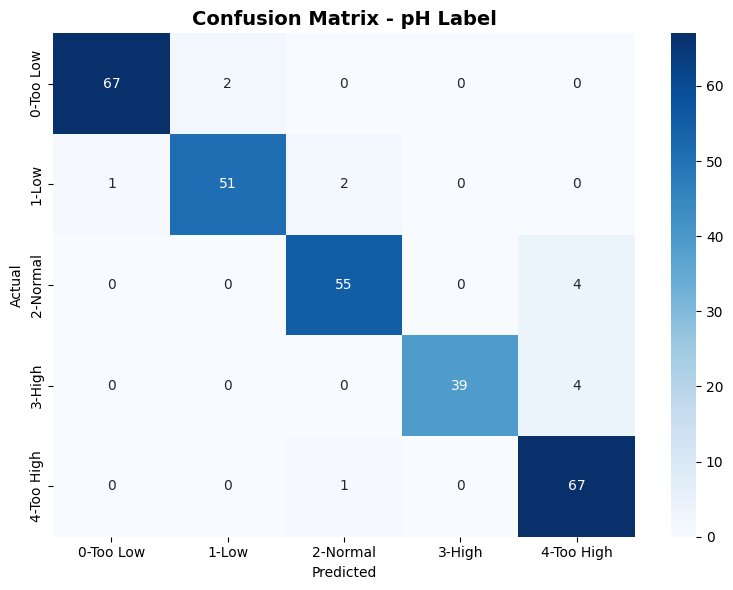


📈 Accuracy by Class:
  0-Too Low: 0.9710 (97.10%)
  1-Low: 0.9444 (94.44%)
  2-Normal: 0.9322 (93.22%)
  3-High: 0.9070 (90.70%)
  4-Too High: 0.9853 (98.53%)


In [62]:
# Cell 9: Detailed Evaluation - pH Label
print("=" * 70)
print("🔵 DETAILED EVALUATION: pH LABEL")
print("=" * 70)

label_names = ['0-Too Low', '1-Low', '2-Normal', '3-High', '4-Too High']

print("\n📊 Classification Report:")
print(classification_report(
    y_test['ph_label'], 
    y_pred_test[:, 0],
    target_names=label_names,
    digits=4
))

# Confusion Matrix
cm = confusion_matrix(y_test['ph_label'], y_pred_test[:, 0])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_names, yticklabels=label_names)
plt.title('Confusion Matrix - pH Label', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print("\n📈 Accuracy by Class:")
for i, name in enumerate(label_names):
    mask = y_test['ph_label'] == i
    if mask.sum() > 0:
        acc = accuracy_score(y_test['ph_label'][mask], y_pred_test[mask, 0])
        print(f"  {name}: {acc:.4f} ({acc*100:.2f}%)")

🟢 DETAILED EVALUATION: TDS LABEL

📊 Classification Report:
              precision    recall  f1-score   support

   0-Too Low     0.9836    0.9836    0.9836        61
       1-Low     0.9808    0.9808    0.9808        52
    2-Normal     1.0000    1.0000    1.0000        51
      3-High     1.0000    1.0000    1.0000        65
  4-Too High     1.0000    1.0000    1.0000        64

    accuracy                         0.9932       293
   macro avg     0.9929    0.9929    0.9929       293
weighted avg     0.9932    0.9932    0.9932       293



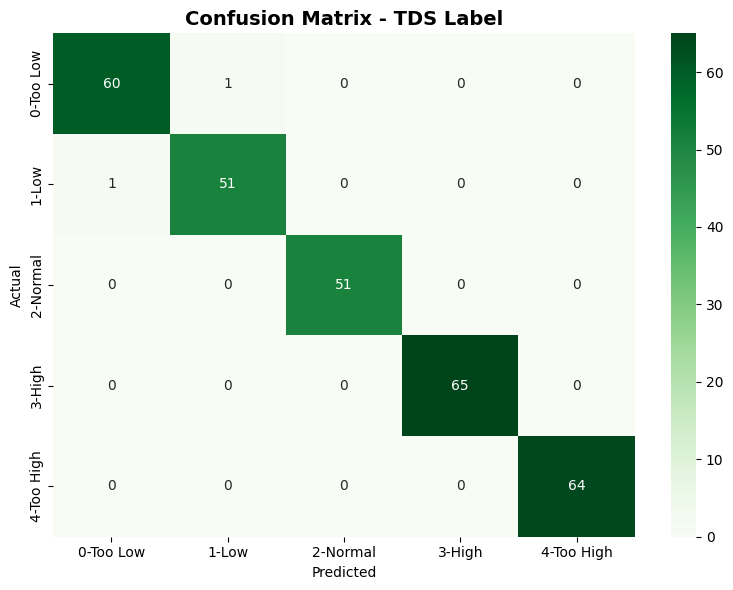


📈 Accuracy by Class:
  0-Too Low: 0.9836 (98.36%)
  1-Low: 0.9808 (98.08%)
  2-Normal: 1.0000 (100.00%)
  3-High: 1.0000 (100.00%)
  4-Too High: 1.0000 (100.00%)


In [63]:
# Cell 10: Detailed Evaluation - TDS Label
print("=" * 70)
print("🟢 DETAILED EVALUATION: TDS LABEL")
print("=" * 70)

label_names_tds = ['0-Too Low', '1-Low', '2-Normal', '3-High', '4-Too High']

print("\n📊 Classification Report:")
print(classification_report(
    y_test['tds_label'], 
    y_pred_test[:, 1],
    target_names=label_names_tds,
    digits=4
))

# Confusion Matrix
cm = confusion_matrix(y_test['tds_label'], y_pred_test[:, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_names_tds, yticklabels=label_names_tds)
plt.title('Confusion Matrix - TDS Label', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print("\n📈 Accuracy by Class:")
for i, name in enumerate(label_names_tds):
    mask = y_test['tds_label'] == i
    if mask.sum() > 0:
        acc = accuracy_score(y_test['tds_label'][mask], y_pred_test[mask, 1])
        print(f"  {name}: {acc:.4f} ({acc*100:.2f}%)")

🟡 DETAILED EVALUATION: AMBIENT LABEL

📊 Classification Report:
                precision    recall  f1-score   support

         0-Bad     1.0000    1.0000    1.0000        97
1-Slightly Off     1.0000    1.0000    1.0000        98
       2-Ideal     1.0000    1.0000    1.0000        98

      accuracy                         1.0000       293
     macro avg     1.0000    1.0000    1.0000       293
  weighted avg     1.0000    1.0000    1.0000       293



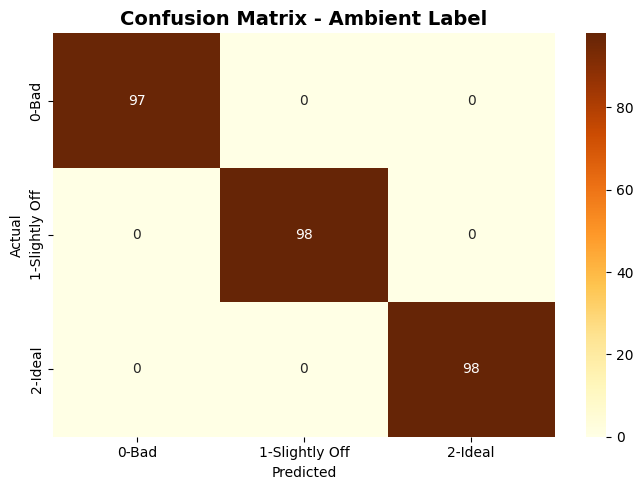


📈 Accuracy by Class:
  0-Bad: 1.0000 (100.00%)
  1-Slightly Off: 1.0000 (100.00%)
  2-Ideal: 1.0000 (100.00%)


In [64]:
# Cell 11: Detailed Evaluation - Ambient Label
print("=" * 70)
print("🟡 DETAILED EVALUATION: AMBIENT LABEL")
print("=" * 70)

label_names_ambient = ['0-Bad', '1-Slightly Off', '2-Ideal']

print("\n📊 Classification Report:")
print(classification_report(
    y_test['ambient_label'], 
    y_pred_test[:, 2],
    target_names=label_names_ambient,
    digits=4
))

# Confusion Matrix
cm = confusion_matrix(y_test['ambient_label'], y_pred_test[:, 2])
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=label_names_ambient, yticklabels=label_names_ambient)
plt.title('Confusion Matrix - Ambient Label', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print("\n📈 Accuracy by Class:")
for i, name in enumerate(label_names_ambient):
    mask = y_test['ambient_label'] == i
    if mask.sum() > 0:
        acc = accuracy_score(y_test['ambient_label'][mask], y_pred_test[mask, 2])
        print(f"  {name}: {acc:.4f} ({acc*100:.2f}%)")

🟠 DETAILED EVALUATION: LIGHT LABEL

📊 Classification Report:
              precision    recall  f1-score   support

  0-Too Dark     1.0000    1.0000    1.0000       104
    1-Normal     1.0000    1.0000    1.0000       107
2-Too Bright     1.0000    1.0000    1.0000        82

    accuracy                         1.0000       293
   macro avg     1.0000    1.0000    1.0000       293
weighted avg     1.0000    1.0000    1.0000       293



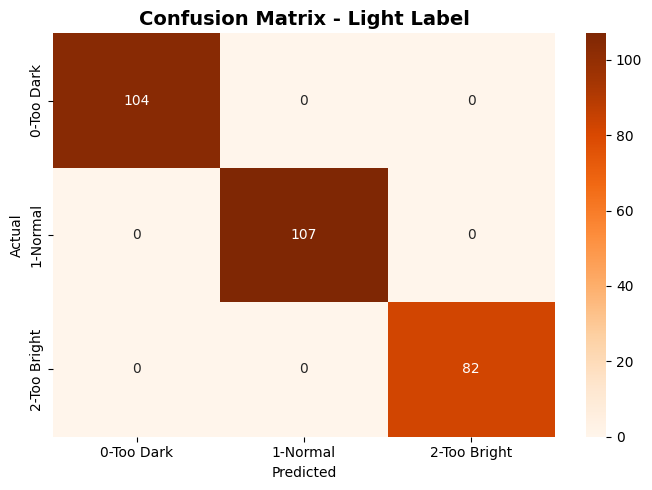


📈 Accuracy by Class:
  0-Too Dark: 1.0000 (100.00%)
  1-Normal: 1.0000 (100.00%)
  2-Too Bright: 1.0000 (100.00%)


In [65]:
# Cell 12: Detailed Evaluation - Light Label
print("=" * 70)
print("🟠 DETAILED EVALUATION: LIGHT LABEL")
print("=" * 70)

label_names_light = ['0-Too Dark', '1-Normal', '2-Too Bright']

print("\n📊 Classification Report:")
print(classification_report(
    y_test['light_label'], 
    y_pred_test[:, 3],
    target_names=label_names_light,
    digits=4
))

# Confusion Matrix
cm = confusion_matrix(y_test['light_label'], y_pred_test[:, 3])
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=label_names_light, yticklabels=label_names_light)
plt.title('Confusion Matrix - Light Label', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print("\n📈 Accuracy by Class:")
for i, name in enumerate(label_names_light):
    mask = y_test['light_label'] == i
    if mask.sum() > 0:
        acc = accuracy_score(y_test['light_label'][mask], y_pred_test[mask, 3])
        print(f"  {name}: {acc:.4f} ({acc*100:.2f}%)")

🌟 FEATURE IMPORTANCE ANALYSIS

📊 pH Label - Feature Importance:
  1. ph: 0.7981
  2. water_temperature: 0.0627
  3. tds: 0.0356
  4. ldr_value: 0.0352
  5. air_humidity: 0.0346
  6. air_temperature: 0.0338

📊 TDS Label - Feature Importance:
  1. tds: 0.8295
  2. water_temperature: 0.0392
  3. ldr_value: 0.0363
  4. air_humidity: 0.0341
  5. ph: 0.0306
  6. air_temperature: 0.0303

📊 Ambient Label - Feature Importance:
  1. air_humidity: 0.4943
  2. air_temperature: 0.4674
  3. water_temperature: 0.0116
  4. tds: 0.0092
  5. ldr_value: 0.0089
  6. ph: 0.0085

📊 Light Label - Feature Importance:
  1. ldr_value: 0.9257
  2. tds: 0.0162
  3. air_humidity: 0.0160
  4. water_temperature: 0.0154
  5. ph: 0.0138
  6. air_temperature: 0.0129


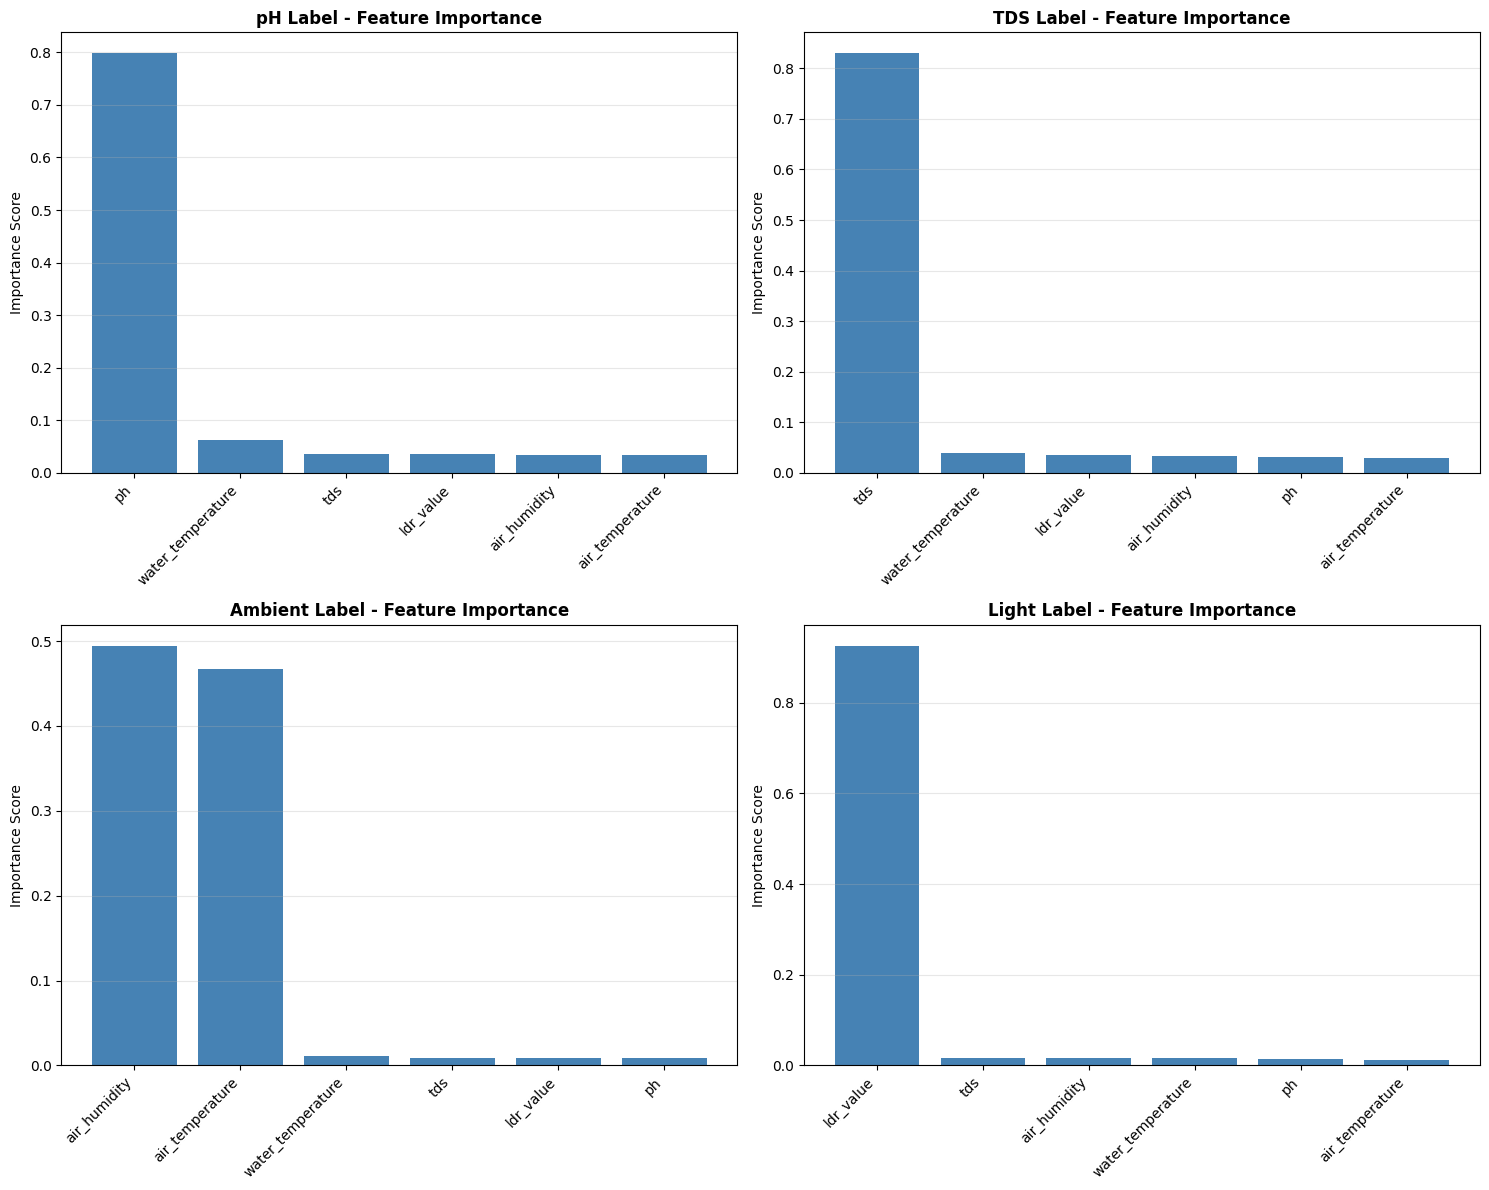

In [66]:
# Cell 13: Feature Importance Analysis
print("=" * 70)
print("🌟 FEATURE IMPORTANCE ANALYSIS")
print("=" * 70)

feature_names = X.columns.tolist()
output_names = ['pH Label', 'TDS Label', 'Ambient Label', 'Light Label']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, (estimator, output_name) in enumerate(zip(multi_output_rf.estimators_, output_names)):
    importances = estimator.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    print(f"\n📊 {output_name} - Feature Importance:")
    for i, idx_feat in enumerate(indices):
        print(f"  {i+1}. {feature_names[idx_feat]}: {importances[idx_feat]:.4f}")
    
    # Plot
    axes[idx].bar(range(len(importances)), importances[indices], color='steelblue')
    axes[idx].set_xticks(range(len(importances)))
    axes[idx].set_xticklabels([feature_names[i] for i in indices], rotation=45, ha='right')
    axes[idx].set_title(f'{output_name} - Feature Importance', fontweight='bold')
    axes[idx].set_ylabel('Importance Score')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

🔄 CROSS-VALIDATION ANALYSIS (5-Fold)

📊 Cross-validation for ph_label...
  Fold scores: [0.97008547 0.94444444 0.97863248 0.96153846 0.96566524]
  Mean: 0.9641 ± 0.0113

📊 Cross-validation for tds_label...
  Fold scores: [0.97435897 0.95726496 0.96153846 0.97008547 0.95708155]
  Mean: 0.9641 ± 0.0070

📊 Cross-validation for ambient_label...
  Fold scores: [1. 1. 1. 1. 1.]
  Mean: 1.0000 ± 0.0000

📊 Cross-validation for light_label...
  Fold scores: [1.         1.         0.9957265  1.         0.99570815]
  Mean: 0.9983 ± 0.0021

📊 CROSS-VALIDATION SUMMARY

ph_label:
  Fold 1: 0.9701
  Fold 2: 0.9444
  Fold 3: 0.9786
  Fold 4: 0.9615
  Fold 5: 0.9657
  Mean ± Std: 0.9641 ± 0.0113

tds_label:
  Fold 1: 0.9744
  Fold 2: 0.9573
  Fold 3: 0.9615
  Fold 4: 0.9701
  Fold 5: 0.9571
  Mean ± Std: 0.9641 ± 0.0070

ambient_label:
  Fold 1: 1.0000
  Fold 2: 1.0000
  Fold 3: 1.0000
  Fold 4: 1.0000
  Fold 5: 1.0000
  Mean ± Std: 1.0000 ± 0.0000

light_label:
  Fold 1: 1.0000
  Fold 2: 1.0000
  Fold

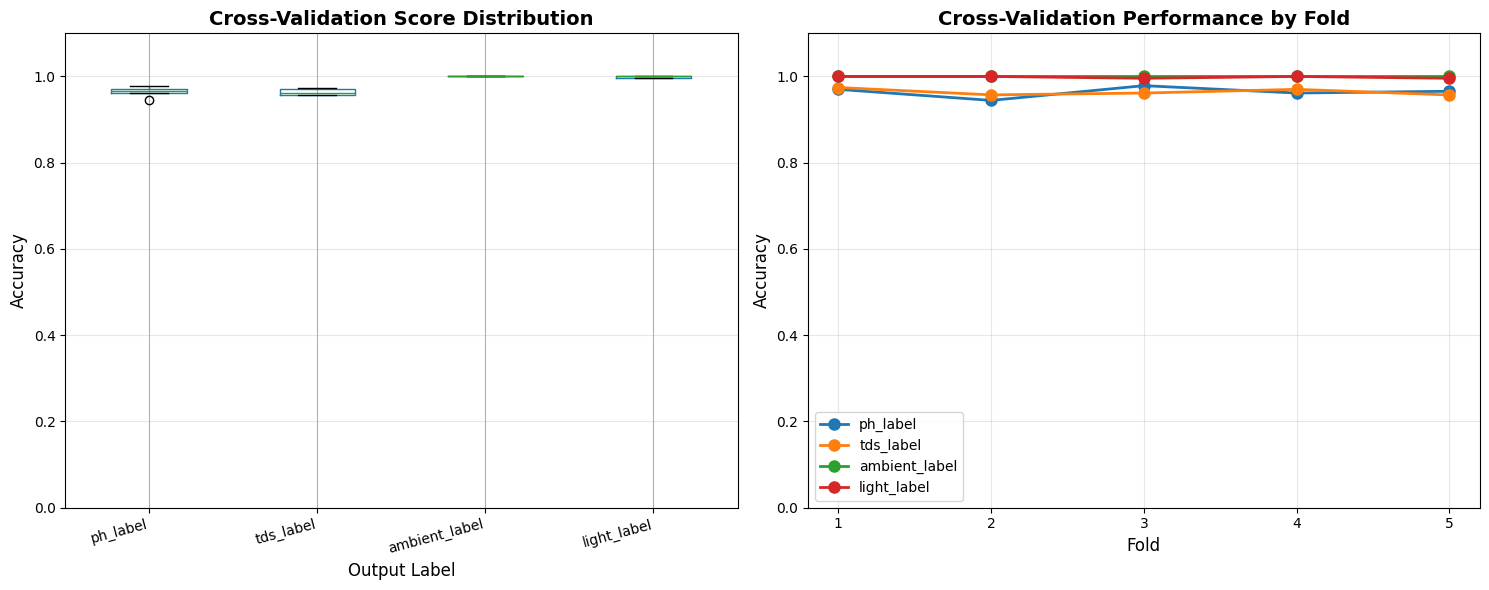


📈 OVERALL CROSS-VALIDATION PERFORMANCE

Overall Mean Accuracy: 0.9816
Overall Std: 0.0188
Min Score: 0.9444
Max Score: 1.0000


In [74]:
# Cell 14: Cross-Validation Analysis (FIXED)
print("=" * 70)
print("🔄 CROSS-VALIDATION ANALYSIS (5-Fold)")
print("=" * 70)

from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create stratified k-fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each output separately
cv_scores = {}

for i, col in enumerate(y.columns):
    print(f"\n📊 Cross-validation for {col}...")
    
    # Extract single output for CV
    y_single = y_train.iloc[:, i]
    
    # Perform 5-fold cross-validation
    scores = cross_val_score(
        multi_output_rf.estimators_[i],  # Use the specific estimator
        X_train, 
        y_single,
        cv=skf,
        scoring='accuracy',
        n_jobs=-1
    )
    
    cv_scores[col] = scores
    
    print(f"  Fold scores: {scores}")
    print(f"  Mean: {scores.mean():.4f} ± {scores.std():.4f}")

# Summary table
print("\n" + "=" * 70)
print("📊 CROSS-VALIDATION SUMMARY")
print("=" * 70)

for col, scores in cv_scores.items():
    print(f"\n{col}:")
    for i, score in enumerate(scores, 1):
        print(f"  Fold {i}: {score:.4f}")
    print(f"  Mean ± Std: {scores.mean():.4f} ± {scores.std():.4f}")

# Visualization - Box plot and line plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Box plot for all outputs
cv_data = pd.DataFrame(cv_scores)
cv_data.boxplot(ax=ax1)
ax1.set_xlabel('Output Label', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Cross-Validation Score Distribution', fontsize=14, fontweight='bold')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha='right')
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim([0, 1.1])

# Plot 2: Line plot per fold
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
folds = np.arange(1, 6)

for i, (col, scores) in enumerate(cv_scores.items()):
    ax2.plot(folds, scores, 'o-', label=col, linewidth=2, 
             markersize=8, color=colors[i])

ax2.set_xlabel('Fold', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Cross-Validation Performance by Fold', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(folds)
ax2.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

# Average performance across all outputs
print("\n" + "=" * 70)
print("📈 OVERALL CROSS-VALIDATION PERFORMANCE")
print("=" * 70)

all_scores = []
for scores in cv_scores.values():
    all_scores.extend(scores)

print(f"\nOverall Mean Accuracy: {np.mean(all_scores):.4f}")
print(f"Overall Std: {np.std(all_scores):.4f}")
print(f"Min Score: {np.min(all_scores):.4f}")
print(f"Max Score: {np.max(all_scores):.4f}")

In [76]:
# Cell 15: Test Predictions with Real Examples
print("=" * 70)
print("🧪 TESTING MODEL WITH SAMPLE PREDICTIONS")
print("=" * 70)

# Create sample inputs
sample_data = pd.DataFrame({
    'ph': [5.8, 6.5, 7.5, 9.2],
    'tds': [800, 1200, 2000, 400],
    'water_temperature': [25.0, 29.0, 26.0, 23.0],
    'air_humidity': [55.0, 75.0, 85.0, 35.0],
    'air_temperature': [24.0, 30.0, 33.0, 18.0],
    'ldr_value': [600, 1500, 3500, 200]
})

predictions = multi_output_rf.predict(sample_data)

print("\n📋 Sample Predictions:")
print("\nFormat: [ph_label, tds_label, ambient_label, light_label]\n")

label_mapping = {
    'ph': {0: 'Too Low', 1: 'Low', 2: 'Normal', 3: 'High', 4: 'Too High'},
    'tds': {0: 'Too Low', 1: 'Low', 2: 'Normal', 3: 'High', 4: 'Too High'},
    'ambient': {0: 'Bad', 1: 'Slightly Off', 2: 'Ideal'},
    'light': {0: 'Too Dark', 1: 'Normal', 2: 'Too Bright'}
}

for i, (idx, row) in enumerate(sample_data.iterrows()):
    pred = predictions[i]
    print(f"Sample {i+1}:")
    print(f"  Input: pH={row['ph']}, TDS={row['tds']}, WaterTemp={row['water_temperature']}°C")
    print(f"         AirTemp={row['air_temperature']}°C, Humidity={row['air_humidity']}%, LDR={row['ldr_value']}")
    print(f"  Output: {pred}")
    print(f"  Interpretation:")
    print(f"    - pH: {label_mapping['ph'][pred[0]]}")
    print(f"    - TDS: {label_mapping['tds'][pred[1]]}")
    print(f"    - Ambient: {label_mapping['ambient'][pred[2]]}")
    print(f"    - Light: {label_mapping['light'][pred[3]]}")
    print()

🧪 TESTING MODEL WITH SAMPLE PREDICTIONS

📋 Sample Predictions:

Format: [ph_label, tds_label, ambient_label, light_label]

Sample 1:
  Input: pH=5.8, TDS=800.0, WaterTemp=25.0°C
         AirTemp=24.0°C, Humidity=55.0%, LDR=600.0
  Output: [1 1 2 1]
  Interpretation:
    - pH: Low
    - TDS: Low
    - Ambient: Ideal
    - Light: Normal

Sample 2:
  Input: pH=6.5, TDS=1200.0, WaterTemp=29.0°C
         AirTemp=30.0°C, Humidity=75.0%, LDR=1500.0
  Output: [2 2 1 1]
  Interpretation:
    - pH: Normal
    - TDS: Normal
    - Ambient: Slightly Off
    - Light: Normal

Sample 3:
  Input: pH=7.5, TDS=2000.0, WaterTemp=26.0°C
         AirTemp=33.0°C, Humidity=85.0%, LDR=3500.0
  Output: [4 3 0 2]
  Interpretation:
    - pH: Too High
    - TDS: High
    - Ambient: Bad
    - Light: Too Bright

Sample 4:
  Input: pH=9.2, TDS=400.0, WaterTemp=23.0°C
         AirTemp=18.0°C, Humidity=35.0%, LDR=200.0
  Output: [4 0 1 0]
  Interpretation:
    - pH: Too High
    - TDS: Too Low
    - Ambient: Slightly O

📊 FINAL MODEL PERFORMANCE SUMMARY

        Output  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score
     pH Label        0.997434       0.952218   0.954411 0.952218  0.952418
    TDS Label        1.000000       0.993174   0.993174 0.993174  0.993174
Ambient Label        1.000000       1.000000   1.000000 1.000000  1.000000
  Light Label        1.000000       1.000000   1.000000 1.000000  1.000000


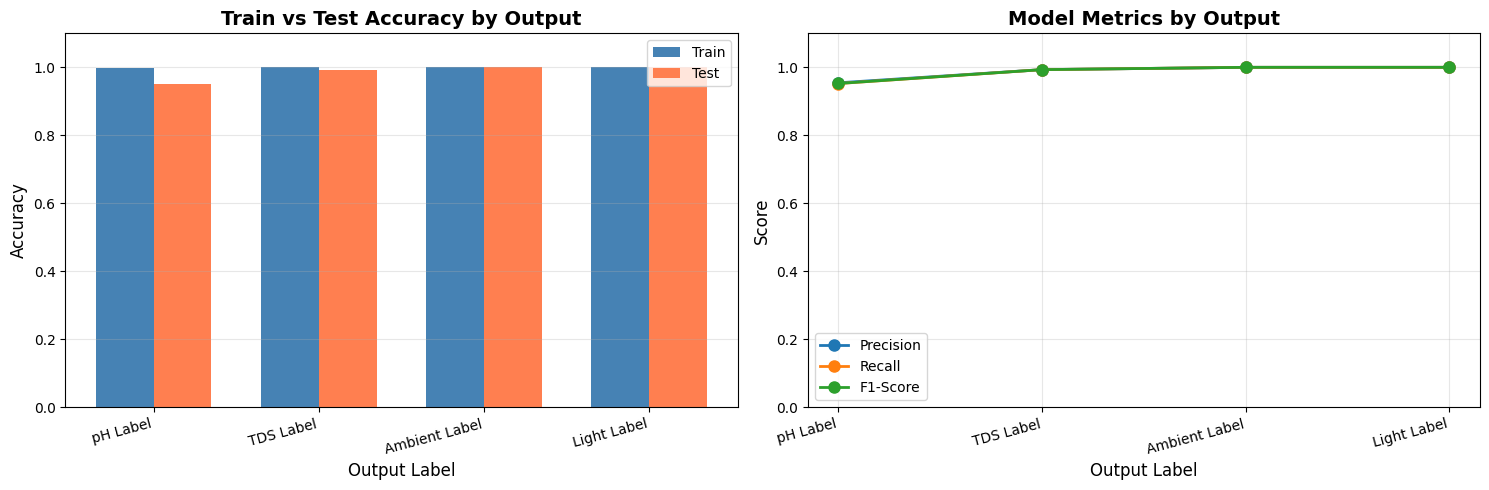


✅ Model evaluation completed!


In [69]:
# Cell 16: Model Performance Summary & Visualization
print("=" * 70)
print("📊 FINAL MODEL PERFORMANCE SUMMARY")
print("=" * 70)

# Collect all metrics
summary_data = {
    'Output': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

output_labels = ['pH Label', 'TDS Label', 'Ambient Label', 'Light Label']

for i, output_name in enumerate(output_labels):
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    train_acc = accuracy_score(y_train.iloc[:, i], y_pred_train[:, i])
    test_acc = accuracy_score(y_test.iloc[:, i], y_pred_test[:, i])
    precision = precision_score(y_test.iloc[:, i], y_pred_test[:, i], average='weighted')
    recall = recall_score(y_test.iloc[:, i], y_pred_test[:, i], average='weighted')
    f1 = f1_score(y_test.iloc[:, i], y_pred_test[:, i], average='weighted')
    
    summary_data['Output'].append(output_name)
    summary_data['Train Accuracy'].append(train_acc)
    summary_data['Test Accuracy'].append(test_acc)
    summary_data['Precision'].append(precision)
    summary_data['Recall'].append(recall)
    summary_data['F1-Score'].append(f1)

summary_df = pd.DataFrame(summary_data)
print("\n", summary_df.to_string(index=False))

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Accuracy Comparison
x = np.arange(len(output_labels))
width = 0.35
ax1.bar(x - width/2, summary_df['Train Accuracy'], width, label='Train', color='steelblue')
ax1.bar(x + width/2, summary_df['Test Accuracy'], width, label='Test', color='coral')
ax1.set_xlabel('Output Label', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Train vs Test Accuracy by Output', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(output_labels, rotation=15, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim([0, 1.1])

# Plot 2: Metrics Comparison
metrics_to_plot = ['Precision', 'Recall', 'F1-Score']
for metric in metrics_to_plot:
    ax2.plot(output_labels, summary_df[metric], marker='o', label=metric, linewidth=2, markersize=8)

ax2.set_xlabel('Output Label', fontsize=12)
ax2.set_ylabel('Score', fontsize=12)
ax2.set_title('Model Metrics by Output', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1.1])
plt.xticks(rotation=15, ha='right')

plt.tight_layout()
plt.show()

print("\n✅ Model evaluation completed!")

In [75]:
# Cell 17: Save the Model
import joblib
import os

# Save model
model_filename = 'hydroponic_multioutput_rf_model.pkl'
joblib.dump(multi_output_rf, model_filename)

print(f"✅ Model saved successfully as '{model_filename}'")
print(f"📦 File size: {os.path.getsize(model_filename) / (1024*1024):.2f} MB")

print("\n📋 Model Information:")
print(f"  - Type: Multi-Output Random Forest Classifier")
print(f"  - Number of outputs: {len(y.columns)}")
print(f"  - Number of features: {len(X.columns)}")
print(f"  - Number of trees per output: {multi_output_rf.estimators_[0].n_estimators}")
print(f"  - Training samples: {len(X_train)}")
print(f"  - Test accuracy: {test_accuracy:.4f}")

print("\n🔄 To load the model later, use:")
print(f"  loaded_model = joblib.load('{model_filename}')")

✅ Model saved successfully as 'hydroponic_multioutput_rf_model.pkl'
📦 File size: 8.71 MB

📋 Model Information:
  - Type: Multi-Output Random Forest Classifier
  - Number of outputs: 4
  - Number of features: 6
  - Number of trees per output: 200
  - Training samples: 1169
  - Test accuracy: 0.9454

🔄 To load the model later, use:
  loaded_model = joblib.load('hydroponic_multioutput_rf_model.pkl')
